In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas
from IPython.display import display

In [34]:
adult_df = pandas.read_csv("./data/adult.csv", index_col=0)
compas_df = pandas.read_csv("./data/compas.csv", index_col=0)
bank_df = pandas.read_csv("./data/bank.csv", index_col=0)
german_df = pandas.read_csv("./data/german.csv", index_col=0)

for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"]
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    df["Accuracy Diff"] = df["Accuracy - Unprivileged"] - df["Accuracy - Privileged"]
    df["False Omission Rate Diff"] = df["False Omission Rate - Unprivileged"] - df["False Omission Rate - Privileged"]
    df["False Discovery Rate Diff"] = df["False Discovery Rate - Unprivileged"] - df["False Discovery Rate - Privileged"]
    df["Statistical Parity Diff"] = df["Unprivileged base Rate"] - df["Privileged base Rate"]
    df["F1 Score Diff"] = df["F1 Score - Unprivileged"] - df["F1 Score - Privileged"]
    for metric in df.columns:
        if "Num" in metric or "rivileged" in metric:
            df.drop(metric, axis=1, inplace=True)
    df.set_index = df[df.columns[0]]
    
    del df["Accuracy"]
    del df["F1 Score"]

In [35]:
def num_interventions(name):
    if name == "Logistic Regression" or name  == "Meta Classifier":
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3

In [36]:
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df.index):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
vals_no_int = []
vals_one_int = []
vals_two_int = []
vals_three_int = []

In [37]:
adult_df.head()

,Theil Index,Consistency,False Positive Rate Diff,False Negative Rate Diff,Accuracy Diff,False Omission Rate Diff,False Discovery Rate Diff,Statistical Parity Diff,F1 Score Diff
OP,0.177833,0.978767,-0.037900,0.159167,0.107767,-0.1317,0.313433,-0.116200,-0.218267
OP + EOP,0.211633,0.919400,0.003300,-0.001600,0.127267,-0.1688,0.320300,-0.038167,-0.087600
OP + CEOP,0.177833,0.978767,-0.037900,0.159167,0.107767,-0.1317,0.313433,-0.116200,-0.218267
OP + ROC,0.119067,0.954533,0.056467,-0.018267,-0.058533,-0.0977,0.312367,-0.032700,-0.288400
OP + GFC,0.201133,0.988200,0.003900,0.040500,0.116567,-0.1578,0.355733,-0.050667,-0.128933


In [38]:
adult_df.columns

Index(['Theil Index', 'Consistency', 'False Positive Rate Diff',
       'False Negative Rate Diff', 'Accuracy Diff', 'False Omission Rate Diff',
       'False Discovery Rate Diff', 'Statistical Parity Diff',
       'F1 Score Diff'],
      dtype='object')

In [39]:
col = adult_df.reindex(columns=["Consistency"], index=one_int)
display(col)
print(col.sum()/len(col))

,Consistency
OP,0.978767
DIR,0.945567
EOP,0.894900
CEOP,0.952000
ROC,0.923333
GFC,0.986700
PR,0.945133
EGR,0.938100
GSR,0.943833


Consistency    0.94537
dtype: float64


In [40]:
'''
metric = "Consistency"
col = adult_df.reindex(columns=[metric], index=no_int)
vals = [float(col.sum()/len(col))]
col = adult_df.reindex(columns=[metric], index=one_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=two_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=three_int)
vals.append(float(col.sum()/len(col)))
heatmap_df = pandas.DataFrame(data=vals, columns=['Consistency'])
'''
heatmap_df = {}

for metric in adult_df.columns:
    if metric == "Adult":
        continue
    col = adult_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = adult_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Adult"] = vals
    
for metric in compas_df.columns:
    if metric == "Compas":
        continue
    col = compas_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = compas_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Compas"] = vals
    
for metric in bank_df.columns:
    if metric == "Bank":
        continue
    col = bank_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = bank_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Bank"] = vals

for metric in german_df.columns:
    if metric == "German":
        continue
    col = german_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = german_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - German"] = vals
    
heatmap_df = pandas.DataFrame(heatmap_df)

heatmap_df

,Theil Index - Adult,Consistency - Adult,False Positive Rate Diff - Adult,False Negative Rate Diff - Adult,Accuracy Diff - Adult,False Omission Rate Diff - Adult,False Discovery Rate Diff - Adult,Statistical Parity Diff - Adult,F1 Score Diff - Adult,Theil Index - Compas,...,F1 Score Diff - Bank,Theil Index - German,Consistency - German,False Positive Rate Diff - German,False Negative Rate Diff - German,Accuracy Diff - German,False Omission Rate Diff - German,False Discovery Rate Diff - German,Statistical Parity Diff - German,F1 Score Diff - German
0,0.124733,0.944167,-0.083067,0.088133,0.118367,-0.104467,-0.020400,-0.183933,-0.048033,0.199367,...,0.034167,0.193700,0.816867,0.171333,-0.108300,-0.131533,0.213467,-0.113500,0.235500,0.111600
1,0.141204,0.945370,-0.016822,0.018263,0.075481,-0.120015,0.146907,-0.101059,-0.158141,0.258185,...,0.068585,0.235030,0.851652,0.110381,-0.065278,-0.150430,0.229130,-0.101674,0.150681,0.106574
2,0.156240,0.944308,-0.010967,0.069162,0.071696,-0.118799,0.170045,-0.092745,-0.202755,0.299533,...,0.061822,0.241426,0.865917,0.074351,-0.029168,-0.137356,0.234554,-0.150121,0.097733,0.089423
3,0.166940,0.941347,-0.013939,0.117447,0.073510,-0.118710,0.149032,-0.095536,-0.246229,0.247124,...,0.045513,0.266265,0.871978,0.054193,0.011822,-0.164211,0.259401,-0.125608,0.054135,0.055457


In [41]:
def isbetter(metric, val1, val2):
    ''' returns true if val2 better than val1'''
    if "Diff" in metric or "Theil" in metric:
        return abs(val2) < abs(val1)
    #if "Accuracy" in metric or "F1" in metric or "Base" in metric or "Consistency" in metric:
    if "Consistency" in metric:
        return val2 > val1
    return val2 < val1

In [42]:
heatmap = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        temp = []
        for col in heatmap_df.columns:
            temp.append(isbetter(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]))
        percentage = sum(temp)/len(temp)
        heatmap[i,j] = percentage

heatmap

array([[0.        , 0.63888889, 0.61111111, 0.52777778],
       [0.36111111, 0.        , 0.58333333, 0.58333333],
       [0.38888889, 0.41666667, 0.        , 0.52777778],
       [0.47222222, 0.41666667, 0.47222222, 0.        ]])

In [43]:
heatmap = np.flip(heatmap, axis=0)
heatmap

array([[0.47222222, 0.41666667, 0.47222222, 0.        ],
       [0.38888889, 0.41666667, 0.        , 0.52777778],
       [0.36111111, 0.        , 0.58333333, 0.58333333],
       [0.        , 0.63888889, 0.61111111, 0.52777778]])

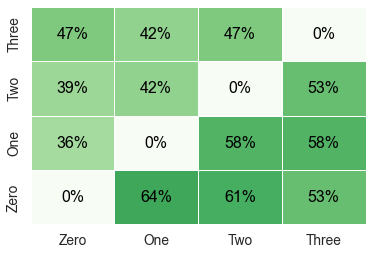

In [45]:
ints = ["Zero", "One", "Two", "Three"]
ax = sns.heatmap(heatmap*100, cmap='Greens', vmin=0, vmax=100, xticklabels=ints, yticklabels=ints[::-1], annot=True, cbar=False, linewidths=.5, annot_kws={"color": 'black', "size":16})
sns.set(font_scale=1.25) # font size 2
for t in ax.texts:
    t.set_text(t.get_text() + "%")
    
plt.savefig('./figures/fairness_heatmap.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [46]:
'''
metric = "Accuracy"
col = adult_df.reindex(columns=[metric], index=no_int)
vals = [float(col.sum()/len(col))]
col = adult_df.reindex(columns=[metric], index=one_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=two_int)
vals.append(float(col.sum()/len(col)))
col = adult_df.reindex(columns=[metric], index=three_int)
vals.append(float(col.sum()/len(col)))
heatmap_df = pandas.DataFrame(data=vals, columns=['Accuracy - Adult'])
'''
adult_df = pandas.read_csv("./data/adult.csv", index_col=0)
compas_df = pandas.read_csv("./data/compas.csv", index_col=0)
bank_df = pandas.read_csv("./data/bank.csv", index_col=0)
german_df = pandas.read_csv("./data/german.csv", index_col=0)

util_metrics = ["Accuracy", "F1 Score"]
heatmap_df = {}

for metric in util_metrics:
    col = adult_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = adult_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = adult_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Adult"] = vals
    
for metric in util_metrics:
    col = compas_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = compas_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = compas_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Compas"] = vals
    
for metric in util_metrics:
    col = bank_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = bank_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = bank_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - Bank"] = vals

for metric in util_metrics:
    col = german_df.reindex(columns=[metric], index=no_int)
    vals = [float(col.sum()/len(col))]
    col = german_df.reindex(columns=[metric], index=one_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=two_int)
    vals.append(float(col.sum()/len(col)))
    col = german_df.reindex(columns=[metric], index=three_int)
    vals.append(float(col.sum()/len(col)))
    heatmap_df[metric + " - German"] = vals
    
heatmap_df = pandas.DataFrame(heatmap_df)

heatmap_df

,Accuracy - Adult,F1 Score - Adult,Accuracy - Compas,F1 Score - Compas,Accuracy - Bank,F1 Score - Bank,Accuracy - German,F1 Score - German
0,0.845133,0.658033,0.671167,0.714367,0.900467,0.518767,0.753333,0.558100
1,0.798226,0.579281,0.613622,0.638548,0.793685,0.380337,0.712352,0.431085
2,0.781532,0.528808,0.599532,0.589319,0.622756,0.270103,0.673418,0.369071
3,0.773786,0.495614,0.615140,0.634596,0.399231,0.168497,0.655699,0.285886


In [47]:
def isworse(metric, val1, val2):
    ''' returns true if val2 worse than val1'''
    #if "Diff" in metric:
    #    return val2 > val1
    #if "Accuracy" in metric or "F1" in metric or "Base" in metric or "Consistency" in metric:
    #    return val2 < val1
    return val2 < val1

In [48]:
heatmap = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        temp = []
        for col in heatmap_df.columns:
            temp.append(isworse(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]))
            #print(isworse(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]), ints[i], ints[j])
            if i==1 and j==0:
                print(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col], isworse(col, heatmap_df.loc[i, col], heatmap_df.loc[j, col]))
        percentage = sum(temp)/len(temp)
        heatmap[i,j] = percentage
        #print(percentage)

heatmap = np.flip(heatmap, axis=0)
heatmap

Accuracy - Adult 0.7982259257777778 0.845133333 False
F1 Score - Adult 0.5792814815555556 0.658033333 False
Accuracy - Compas 0.6136222222222223 0.6711666666666667 False
F1 Score - Compas 0.6385481481481481 0.7143666666666667 False
Accuracy - Bank 0.793685185185185 0.9004666666666666 False
F1 Score - Bank 0.380337037037037 0.5187666666666667 False
Accuracy - German 0.7123518518518518 0.7533333333333333 False
F1 Score - German 0.4310851851851852 0.5581 False


array([[0.   , 0.125, 0.25 , 0.   ],
       [0.   , 0.   , 0.   , 0.75 ],
       [0.   , 0.   , 1.   , 0.875],
       [0.   , 1.   , 1.   , 1.   ]])

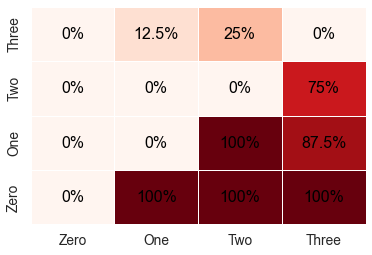

In [49]:
ints = ["Zero", "One", "Two", "Three"]

ax = sns.heatmap(heatmap*100, cmap='Reds', vmin=0, vmax=100, xticklabels=ints, yticklabels=ints[::-1], annot=True, cbar=False, fmt='g', linewidths=.5, annot_kws={"color": 'black', "size":16})
#ax = sns.heatmap(heatmap*100, cmap='Greens', vmin=0, vmax=100, xticklabels=ints, yticklabels=ints[::-1], annot=True, cbar=False, linewidths=.5, annot_kws={"color": 'black', "size":16})
sns.set(font_scale=1.25) # font size 2
for t in ax.texts:
    t.set_text(t.get_text() + "%")
    
plt.savefig('./figures/utility_heatmap.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [126]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [127]:
np.flip(a, axis=0)

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])